# Quora Question Pairs

중복 질문을 찾아서 이미 잘 작성된 답변들을 사용자들이 참고할 수 있도록 하자

In [1]:
import numpy as np
import pandas as pd
import os

import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [4]:
DATA_DIR = './data/quora-question-pairs/'
TRAIN = 'train.csv'
TEST = 'test.csv'

In [5]:
train_data = pd.read_csv(os.path.join(DATA_DIR, TRAIN))
train_data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [6]:
print('Size of File: ' )
for file in os.listdir(DATA_DIR):
    if 'csv' in file and 'zip' not in file:
        print(file.ljust(30) + str(round(os.path.getsize(DATA_DIR + file) / 1000000, 2)) + 'MB')

Size of File: 
test.csv                      477.59MB
train.csv                     63.4MB
sample_submission.csv         22.35MB


In [7]:
print('Total Length of Training Dataset : ', len(train_data))

Total Length of Training Dataset :  404290


Order of Data Analysis
- 질문 중복 분석
- 레이블 빈도 분석
- 문자 분석
- 단어 분석

In [8]:
train_set = pd.Series(train_data['question1'].tolist() + train_data['question2'].tolist()).astype(str)
train_set.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
dtype: object

In [9]:
train_set[0]

'What is the step by step guide to invest in share market in india?'

In [10]:
train_set[1]

'What is the story of Kohinoor (Koh-i-Noor) Diamond?'

In [12]:
train_set[len(train_data) + 1]

'What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?'

질문의 중복 여부 확인 필요

In [13]:
print('Training Dataset의 총 질문 수 : {}'.format(len(np.unique(train_set))))
print('반복해서 나타나는 질문 수 : {}'.format(np.sum(train_set.value_counts() > 1)))

Training Dataset의 총 질문 수 : 537361
반복해서 나타나는 질문 수 : 111873


Text(0, 0.5, 'Number of questions')

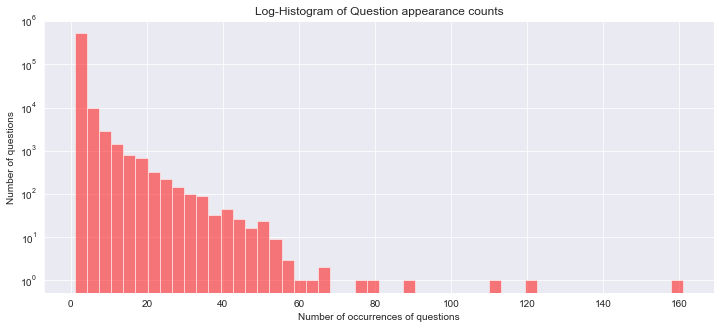

In [16]:
plt.figure(figsize=(12, 5))
plt.hist(train_set.value_counts(), bins=50, alpha=0.5, color='r', label='word')
# plt.yscale('log', nonposy='clip')
plt.yscale('log')
plt.title('Log-Histogram of Question appearance counts')
plt.xlabel('Number of occurrences of questions')
plt.ylabel('Number of questions')

In [17]:
train_set.value_counts()

What are the best ways to lose weight?                                                    161
How can you look at someone's private Instagram account without following them?           120
How can I lose weight quickly?                                                            111
What's the easiest way to make money online?                                               88
Can you see who views your Instagram?                                                      79
                                                                                         ... 
Should I buy my iPhone from the Apple Store or from my cellphone service provider?          1
How much do toucans eat in a day? What do they eat?                                         1
Is it a logical move for Kiip.me to grow their business on the Mountain Lion platform?      1
Is Hla b27 curable?                                                                         1
What is it like to have sex with your cousin?               

중복 횟수가 1인 데이터가 가장 많고, 대부분 50번 이하

글괴 매우 큰 빈도를 가진 질문은 이상치가 될 거심

In [19]:
print('중복 최대 개수: ', np.max(train_set.value_counts()))
print('중복 최소 개수: ', np.min(train_set.value_counts()))
print('중복 평균 개수: ', np.mean(train_set.value_counts()))
print('중복 표준편차: {:.2f}'.format(np.std(train_set.value_counts())))
print('중복 Median : ', np.median(train_set.value_counts()))
print('중복 Q1: ', np.percentile(train_set.value_counts(), 25))
print('중복 Q3: ', np.percentile(train_set.value_counts(), 75))

중복 최대 개수:  161
중복 최소 개수:  1
중복 평균 개수:  1.50472401234924
중복 표준편차: 1.91
중복 Median :  1.0
중복 Q1:  1.0
중복 Q3:  1.0


기초 집계함수와 Quartile로 미뤄 봤을 때 중복 개수가 엄청 많음

{'whiskers': [<matplotlib.lines.Line2D at 0x28cf0c1f0>,
 'caps': [<matplotlib.lines.Line2D at 0x28cf0caf0>,
 'boxes': [<matplotlib.lines.Line2D at 0x28cf0c6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x28cdac130>],
 'fliers': [<matplotlib.lines.Line2D at 0x28cdaa2b0>],
 'means': [<matplotlib.lines.Line2D at 0x28cdac940>]}

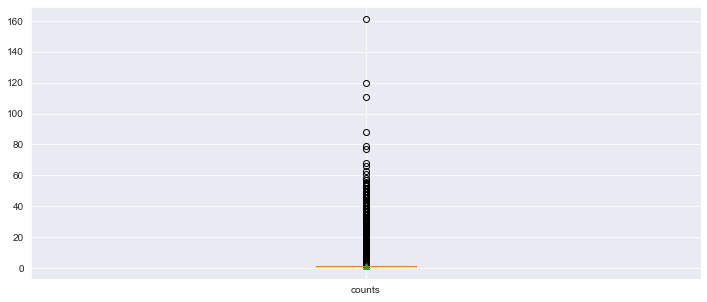

In [22]:
plt.figure(figsize=(12, 5))
plt.boxplot([train_set.value_counts()], labels=['counts'], showmeans=True)

Word Cloud 확인

In [23]:
from wordcloud import WordCloud

(-0.5, 799.5, 599.5, -0.5)

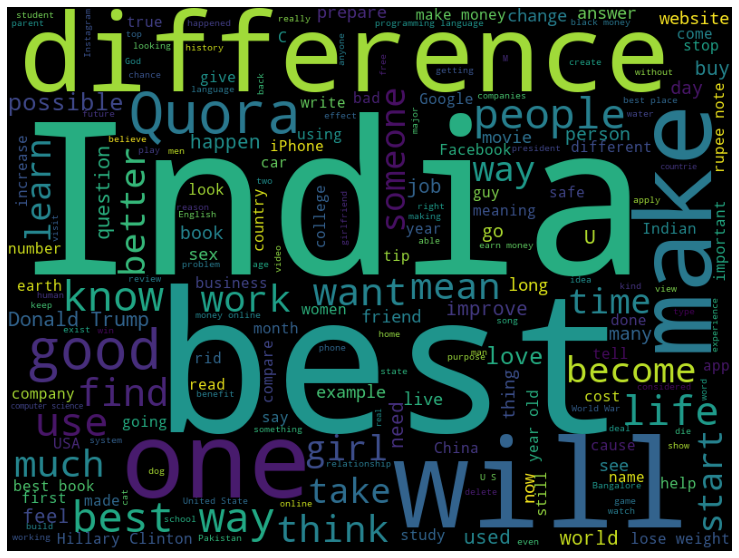

In [24]:
cloud = WordCloud(width=800, height=600).generate(" ".join(train_set.astype(str)))
plt.figure(figsize=(15, 10))
plt.imshow(cloud)
plt.axis('off')

`is_duplicate` 확인

<AxesSubplot:xlabel='is_duplicate', ylabel='count'>

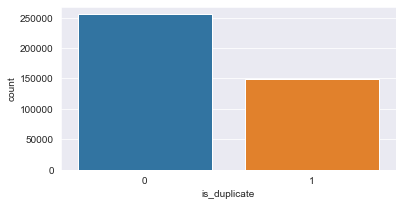

In [30]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(6, 3)
sns.countplot(x=train_data['is_duplicate'])

불균형 처리 방안 추후 고민

텍스트 데이터 길이 분석 진행

In [31]:
train_length = train_set.apply(len)
train_length

0          66
1          51
2          73
3          50
4          76
         ... 
808575     79
808576     42
808577     17
808578    127
808579     45
Length: 808580, dtype: int64

Text(0, 0.5, 'Probability')

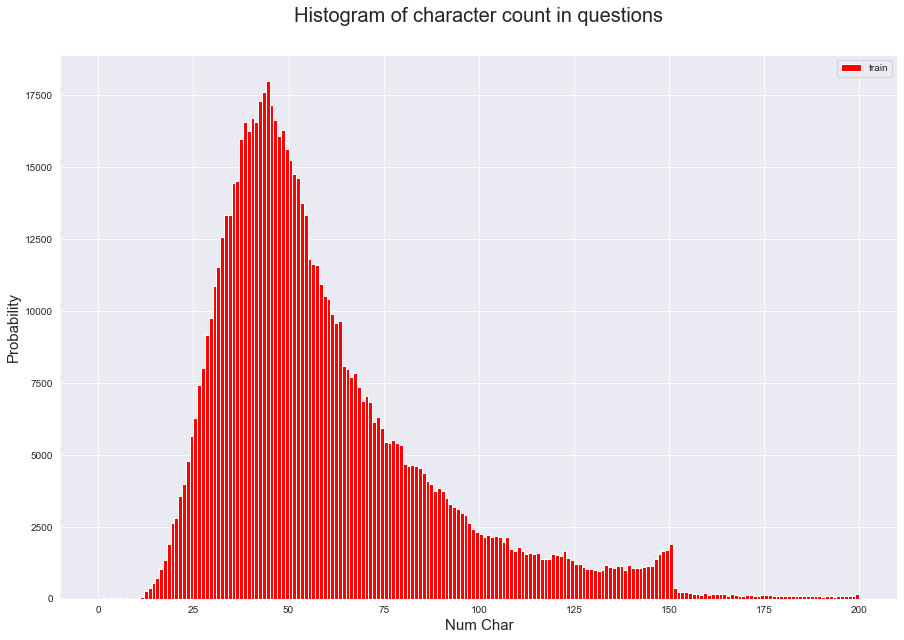

In [34]:
plt.figure(figsize=(15, 10))
plt.hist(train_length, bins=200, range=[0, 200], facecolor='r', label='train')
plt.title("Histogram of character count in questions", y=1.05, fontsize=20)
plt.legend()
plt.xlabel('Num Char', fontsize=15)
plt.ylabel("Probability", fontsize=15)

In [35]:
print('질문 길이 최댓값: ', np.max(train_length))
print('질문 길이 평균값: ', np.mean(train_length))
print('질문 길이 STD: ', np.std(train_length))
print('질문 길이 MEDIAN: ', np.median(train_length))
print('질문 길이 Q1: ', np.percentile(train_length, 25))
print('질문 길이 Q3: ', np.percentile(train_length, 75))

질문 길이 최댓값:  1169
질문 길이 평균값:  59.82254817086745
질문 길이 STD:  31.963731729269114
질문 길이 MEDIAN:  51.0
질문 길이 Q1:  39.0
질문 길이 Q3:  72.0
